In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def create_radar_chart(labels, datasets, category_names, category_spans, category_colors, fill_models=False, title="Radar Chart", hide_outer_circle=False):

    num_vars = len(labels)

    # --- Calculate Angles ---
    # Angles for the axes (in radians).
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # Angles for plotting data lines (close the loop).
    plot_angles = angles + angles[:1]
    # Angle delta between axes
    delta_angle = 2 * np.pi / num_vars

    # --- Initialize Plot ---
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))  # Increase size further

    # --- Styling ---
    plt.style.use('seaborn-v0_8-whitegrid')
    font_family = 'sans-serif'
    plt.rcParams['font.family'] = font_family
    
    # Turn off all outer spines, including the outermost circle
    ax.spines['polar'].set_visible(False)

    # --- Set Axis Limits and Ticks (Range 0-1) ---
    min_val = 0
    max_val = 1.0
    # Important: Set ylim to a higher value to ensure arcs are visible
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(min_val, visible_max)
    
    # --- Add Outer Category Arcs FIRST (moving this section earlier) ---
    start_angle_idx = 0
    arc_radius = max_val + 0.12  # Radius for the arc
    text_radius = arc_radius + 0.15  # Radius for the text label

    for i, span in enumerate(category_spans):
        end_angle_idx = start_angle_idx + span
        
        # Get angles for this category section
        original_start_angle = angles[start_angle_idx]
        original_end_angle = angles[(end_angle_idx - 1) % num_vars]
        
        # Handle wrapping around the circle
        if original_end_angle < original_start_angle:
            original_end_angle += 2 * np.pi
            
        # Add padding for the arcs
        angle_padding = delta_angle * 0.50
        arc_start_angle = original_start_angle - angle_padding
        arc_end_angle = original_end_angle + angle_padding
        
        # Instead of using matplotlib's line with round caps, create a patch for a straight-edged arc
        color = category_colors[i]
        
        # Create arc points
        arc_theta = np.linspace(arc_start_angle, arc_end_angle, 100)
        inner_r = arc_radius - 0.12  # Inner radius of the arc
        outer_r = arc_radius + 0.50  # Outer radius of the arc
        
        # Create a list of points for the arc patch (straight edges)
        verts = []
        # Add points along the outer edge of the arc
        for t in arc_theta:
            verts.append((t, outer_r))
        # Add points along the inner edge of the arc (in reverse)
        for t in arc_theta[::-1]:
            verts.append((t, inner_r))
        
        # Create a polygon patch for the arc with zorder=0 (very back)
        arc_patch = mpatches.Polygon(verts, closed=True, color=color, alpha=0.5, zorder=0)
        ax.add_patch(arc_patch)
        
        start_angle_idx = end_angle_idx % num_vars

        # Add the category label
        # Calculate midpoint angle for the category label
        mid_angle = (arc_start_angle + arc_end_angle) / 2
        ax.text(
            mid_angle, text_radius+0.22, category_names[i],
            ha='center', va='center',
            fontsize=30, fontweight='bold', color='black',
            #bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5, edgecolor=color)
        )

    
    # Set ticks in the data range
    yticks = np.linspace(min_val, max_val, 6)  # 0, 0.2, ..., 1.0
    ax.set_yticks(yticks-0.065)
    ax.set_yticklabels([f"{i:.1f}" for i in yticks], color="grey", size=10)
    
    # Move radial labels position
    ax.set_rlabel_position(0)  # Position at 0 degrees
    
    # --- Draw the outermost circle (make it bolder) ---
    theta = np.linspace(0, 2*np.pi, 500)
    r = np.ones_like(theta)
    # if not hide_outer_circle:
    #     ax.plot(theta, r, color='gray', linewidth=2.5, zorder=10)  # Bolder outer circle
    
    # --- Modify grid appearance ---
    # Remove default grid
    ax.grid(False)
    
    # Manually draw circular grid lines (except the outermost which we drew above)
    for ytick in yticks[1:-1]:  # Exclude the last tick (1.0) which we drew above
        ax.plot(theta, np.ones_like(theta) * ytick, color='gray', linestyle='-', linewidth=0.8, alpha=0.3, zorder=10)
    ax.plot(theta, np.ones_like(theta) * yticks[-1], color='gray', linestyle='-', linewidth=2, alpha=1, zorder=10)

    # --- Draw axis lines that extend all the way to the center ---
    # ax.set_ylim(0, max_val)
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(0, visible_max)
    for angle in angles:
        ax.plot([angle, angle], [0, max_val], color='gray', linestyle='-', linewidth=0.8, alpha=0.5, zorder=10)

    # --- Plot Multiple Datasets ---
    prop_cycle = plt.rcParams['axes.prop_cycle']
    line_colors = prop_cycle.by_key()['color']

    for i, (name, data) in enumerate(datasets.items()):
        plot_data = data + data[:1]  # Close the loop
        color = line_colors[i % len(line_colors)]
        ax.plot(plot_angles, plot_data, linewidth=3.5, linestyle='solid', color=color, label=name, zorder=15)
        # Remove filling regardless of fill_models parameter
        # No fill for model lines per user request

    # --- Customize Axes Labels ---
    print("Angles: ", angles)
    ax.set_xticks(np.array(angles))
    ax.tick_params(axis='x', pad=-55)  # Reduced padding for labels
    ax.set_xticklabels(labels, size=26, fontweight='bold', zorder=20)  # Very high zorder for labels

    # --- Add Title and Legend ---
    # plt.title(title, size=18, weight='bold', y=1.05)
    
    # Customize the legend with highest zorder
    # legend = ax.legend(
    #     loc='upper right', 
    #     bbox_to_anchor=(1.25, 1.0),
    #     frameon=True,
    #     framealpha=0.9,
    #     fontsize=16,
    #     # zorder=25  # Highest zorder
    # )
    # legend.get_frame().set_edgecolor('lightgray')

    plt.tight_layout()
    
    return fig, ax

In [2]:
# 1. Define Labels
doc_elements = ["<15%", f"15-25%",">25%"]
layout = ["<4 pg","4-8 pg",">8 pg"]
nlp_entities = ["Num.", "Temp.", "Misc", "Location", "Struct."]
all_labels = doc_elements + layout + nlp_entities

In [3]:
# 2. Define Category Names, Spans, and Colors
category_names = ["Document\nElement", "Layout", "NLP\nEntity Type"]
category_spans = [len(doc_elements), len(layout), len(nlp_entities)]
category_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

In [5]:
# 3. Provide Sample Data
datasets_example = {
    'Phi 4':            [],
    'Molmo 7B':         [],
    'Ovis 1.6 9B':      [],
    'Llama 3.2 11B':    [],
    'Llava 1.6 34B':    [],
    'Gemma 3 27B':      [],
    'Qwen 2.5 7B':      [],
    'Qwen 2.5 72B':     [],
    'InternVL 3 9B':    [],
    'InternVL 3 78B':   [],
    'GPT-4.1-mini':     [],
    'O3':               [], 
}

In [6]:
order_colums=['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']

In [7]:
# read results/QUR_DE.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read results/QUR_DE.csv
df = pd.read_csv('results_w1/results/QUR_DED.csv', index_col=0)
df = df[order_colums]
df

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
<15,0.033149,0.353591,0.226519,0.331492,0.339779,0.392265,0.491713,0.571823,0.243094,0.212707,0.265193,0.165746
15-25,0.000000,0.117647,0.117647,0.176471,0.588235,0.470588,0.352941,0.647059,0.117647,0.176471,0.058824,0.117647
>25,0.111111,0.296296,0.148148,0.333333,0.444444,0.370370,0.555556,0.666667,0.296296,0.333333,0.370370,0.148148


In [8]:
# weights = {
# '<15': 0.6684491978609626,
# '>25': 0.22459893048128343,
# '15-25': 0.10695187165775401
# }
weights = {'<15': 1.0, '15-25': 0.16, '>25': 0.336}

In [9]:
index_list = list(weights.keys())
index_list

['<15', '15-25', '>25']

In [10]:
normalized_df = pd.DataFrame(columns=order_colums)
# Normalize the values in the DataFrame. The weights dictionary is linked to dataframe index
for i, row in df.iterrows():
    # print(i,row.values)
    normalized_row = row.values*weights[i]
    # print(type(normalized_row),normalized_row)
    normalized_df.loc[len(normalized_df)] = normalized_row
# set indexes equal to the keys of weights
normalized_df.index = index_list
# normalized_df

# sort rows by index [<15, 15-25, >25]
normalized_df = normalized_df.reindex(['<15', '15-25', '>25'])
# normalized_df = normalized_df.sort_index()
normalized_df

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
<15,0.033149,0.353591,0.226519,0.331492,0.339779,0.392265,0.491713,0.571823,0.243094,0.212707,0.265193,0.165746
15-25,0.000000,0.018824,0.018824,0.028235,0.094118,0.075294,0.056471,0.103529,0.018824,0.028235,0.009412,0.018824
>25,0.037333,0.099556,0.049778,0.112000,0.149333,0.124444,0.186667,0.224000,0.099556,0.112000,0.124444,0.049778


In [11]:
# add first row to datasets_example
for i, row in normalized_df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1
datasets_example

{'Phi 4': [0.0331491712707182, 0.0, 0.037333333333333336],
 'Molmo 7B': [0.3535911602209944, 0.018823529411764704, 0.09955555555555555],
 'Ovis 1.6 9B': [0.2265193370165746,
  0.018823529411764704,
  0.04977777777777777],
 'Llama 3.2 11B': [0.3314917127071823, 0.028235294117647056, 0.112],
 'Llava 1.6 34B': [0.3397790055248619,
  0.09411764705882353,
  0.14933333333333335],
 'Gemma 3 27B': [0.3922651933701657, 0.07529411764705882, 0.12444444444444443],
 'Qwen 2.5 7B': [0.4917127071823204, 0.05647058823529411, 0.18666666666666668],
 'Qwen 2.5 72B': [0.5718232044198895, 0.10352941176470588, 0.224],
 'InternVL 3 9B': [0.2430939226519337,
  0.018823529411764704,
  0.09955555555555555],
 'InternVL 3 78B': [0.212707182320442, 0.028235294117647056, 0.112],
 'GPT-4.1-mini': [0.2651933701657458,
  0.009411764705882352,
  0.12444444444444443],
 'O3': [0.1657458563535911, 0.018823529411764704, 0.04977777777777777]}

In [12]:
df = pd.read_csv('results_w1/results/QUR_PL.csv', index_col=0)
df = df.sort_index(ascending=True)
df = df[order_colums]
df

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
1,0.119048,0.285714,0.309524,0.380952,0.714286,0.452381,0.500000,0.714286,0.190476,0.214286,0.238095,0.166667
2,0.000000,0.283784,0.148649,0.270270,0.500000,0.472973,0.500000,0.567568,0.202703,0.256757,0.202703,0.175676
3,0.050000,0.350000,0.175000,0.375000,0.450000,0.550000,0.525000,0.550000,0.300000,0.300000,0.125000,0.125000
4,0.000000,0.263158,0.236842,0.236842,0.605263,0.578947,0.473684,0.789474,0.315789,0.157895,0.368421,0.236842
5,0.000000,0.257143,0.342857,0.342857,0.171429,0.285714,0.485714,0.571429,0.257143,0.228571,0.200000,0.171429
6,0.057143,0.428571,0.400000,0.428571,0.371429,0.485714,0.542857,0.657143,0.285714,0.200000,0.428571,0.114286
7,0.000000,0.333333,0.250000,0.416667,0.083333,0.583333,0.666667,0.666667,0.250000,0.250000,0.583333,0.416667
8,0.117647,0.470588,0.470588,0.411765,0.235294,0.529412,0.470588,0.529412,0.411765,0.411765,0.352941,0.294118
9,0.000000,0.294118,0.058824,0.352941,0.235294,0.294118,0.470588,0.470588,0.176471,0.235294,0.117647,0.000000
10,0.272727,0.454545,0.272727,0.363636,0.363636,0.272727,0.636364,0.454545,0.454545,0.454545,0.363636,0.272727


In [13]:
# remove rows linked to index values 4,5,11,12
df = df.drop(index=[5,6,17,20])
df

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
1,0.119048,0.285714,0.309524,0.380952,0.714286,0.452381,0.500000,0.714286,0.190476,0.214286,0.238095,0.166667
2,0.000000,0.283784,0.148649,0.270270,0.500000,0.472973,0.500000,0.567568,0.202703,0.256757,0.202703,0.175676
3,0.050000,0.350000,0.175000,0.375000,0.450000,0.550000,0.525000,0.550000,0.300000,0.300000,0.125000,0.125000
4,0.000000,0.263158,0.236842,0.236842,0.605263,0.578947,0.473684,0.789474,0.315789,0.157895,0.368421,0.236842
7,0.000000,0.333333,0.250000,0.416667,0.083333,0.583333,0.666667,0.666667,0.250000,0.250000,0.583333,0.416667
8,0.117647,0.470588,0.470588,0.411765,0.235294,0.529412,0.470588,0.529412,0.411765,0.411765,0.352941,0.294118
9,0.000000,0.294118,0.058824,0.352941,0.235294,0.294118,0.470588,0.470588,0.176471,0.235294,0.117647,0.000000
10,0.272727,0.454545,0.272727,0.363636,0.363636,0.272727,0.636364,0.454545,0.454545,0.454545,0.363636,0.272727
11,0.000000,0.800000,0.400000,0.400000,0.200000,1.000000,1.000000,1.000000,1.000000,0.600000,0.800000,0.000000
13,0.055556,0.222222,0.000000,0.444444,0.000000,0.111111,0.500000,0.444444,0.055556,0.111111,0.055556,0.055556


In [14]:
df.columns

Index(['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen',
       'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3'],
      dtype='object')

In [19]:
# discretize df by index. New index are 1-4, 5-8, >8
df['index'] = pd.cut(df.index, bins=[0, 4, 8, 100], labels=['<4pg', '4pg-8pg', '>8pg'])
df = df.groupby('index').mean()
# normalized_df = normalized_df.reset_index()
index_list = ['<4pg', '4pg-8pg', '>8pg']
# df = df.drop(columns=['index'])
# df.index = index_list
df


/tmp/ipykernel_709989/1092106886.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('index').mean()


,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
index,,,,,,,,,,,,
<4pg,0.042262,0.295664,0.217504,0.315766,0.567387,0.513575,0.499671,0.655332,0.252242,0.232234,0.233555,0.176046
4pg-8pg,0.058824,0.401961,0.360294,0.414216,0.159314,0.556373,0.568627,0.598039,0.330882,0.330882,0.468137,0.355392
>8pg,0.041035,0.440111,0.141444,0.370128,0.131116,0.234745,0.525869,0.571197,0.285821,0.200119,0.317105,0.166035


In [20]:
for i, row in df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1

In [21]:
datasets_example

{'Phi 4': [0.0331491712707182,
  0.0,
  0.037333333333333336,
  0.04226190476190475,
  0.0588235294117647,
  0.04103535353535352],
 'Molmo 7B': [0.3535911602209944,
  0.018823529411764704,
  0.09955555555555555,
  0.29566399105872787,
  0.40196078431372545,
  0.4401106654783125],
 'Ovis 1.6 9B': [0.2265193370165746,
  0.018823529411764704,
  0.04977777777777777,
  0.21750364085890397,
  0.36029411764705876,
  0.14144385026737968],
 'Llama 3.2 11B': [0.3314917127071823,
  0.028235294117647056,
  0.112,
  0.31576618912145227,
  0.4142156862745098,
  0.37012774806892457],
 'Llava 1.6 34B': [0.3397790055248619,
  0.09411764705882353,
  0.14933333333333335,
  0.5673872180451127,
  0.15931372549019604,
  0.1311163101604278],
 'Gemma 3 27B': [0.3922651933701657,
  0.07529411764705882,
  0.12444444444444443,
  0.5135753234437446,
  0.5563725490196079,
  0.23474450386215093],
 'Qwen 2.5 7B': [0.4917127071823204,
  0.05647058823529411,
  0.18666666666666668,
  0.49967105263157896,
  0.5686274509

In [22]:
df = pd.read_csv('results_w1/results/QUR_NLPE.csv', index_col=0)
df = df[order_colums]
df

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
NUMERIC,0.006803,0.340136,0.163265,0.340136,0.312925,0.299320,0.442177,0.564626,0.142857,0.197279,0.197279,0.115646
TEMPORAL,0.148936,0.510638,0.276596,0.553191,0.340426,0.382979,0.638298,0.659574,0.361702,0.255319,0.468085,0.297872
ENTITY,0.019417,0.255663,0.207120,0.297735,0.368932,0.343042,0.420712,0.514563,0.184466,0.145631,0.200647,0.116505
LOCATION,0.038462,0.453846,0.307692,0.346154,0.430769,0.607692,0.684615,0.692308,0.400000,0.300000,0.338462,0.215385
STRUCTURE,0.117647,0.264706,0.176471,0.264706,0.411765,0.264706,0.235294,0.529412,0.176471,0.147059,0.205882,0.088235


In [23]:
for i, row in df.iterrows():
    print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1

NUMERIC [0.00680272 0.34013605 0.16326531 0.34013605 0.31292517 0.29931973
 0.44217687 0.56462585 0.14285714 0.19727891 0.19727891 0.11564626]
TEMPORAL [0.14893617 0.5106383  0.27659574 0.55319149 0.34042553 0.38297872
 0.63829787 0.65957447 0.36170213 0.25531915 0.46808511 0.29787234]
ENTITY [0.01941748 0.25566343 0.20711974 0.29773463 0.36893204 0.34304207
 0.42071197 0.51456311 0.18446602 0.14563107 0.20064725 0.11650485]
LOCATION [0.03846154 0.45384615 0.30769231 0.34615385 0.43076923 0.60769231
 0.68461538 0.69230769 0.4        0.3        0.33846154 0.21538462]
STRUCTURE [0.11764706 0.26470588 0.17647059 0.26470588 0.41176471 0.26470588
 0.23529412 0.52941176 0.17647059 0.14705882 0.20588235 0.08823529]


In [24]:
for k,v in datasets_example.items():
    print(k,len(v),v)

Phi 4 11 [0.0331491712707182, 0.0, 0.037333333333333336, 0.04226190476190475, 0.0588235294117647, 0.04103535353535352, 0.0068027210884353, 0.1489361702127659, 0.0194174757281553, 0.0384615384615384, 0.1176470588235294]
Molmo 7B 11 [0.3535911602209944, 0.018823529411764704, 0.09955555555555555, 0.29566399105872787, 0.40196078431372545, 0.4401106654783125, 0.3401360544217687, 0.5106382978723404, 0.255663430420712, 0.4538461538461538, 0.2647058823529412]
Ovis 1.6 9B 11 [0.2265193370165746, 0.018823529411764704, 0.04977777777777777, 0.21750364085890397, 0.36029411764705876, 0.14144385026737968, 0.1632653061224489, 0.2765957446808511, 0.2071197411003236, 0.3076923076923077, 0.1764705882352941]
Llama 3.2 11B 11 [0.3314917127071823, 0.028235294117647056, 0.112, 0.31576618912145227, 0.4142156862745098, 0.37012774806892457, 0.3401360544217687, 0.5531914893617021, 0.2977346278317152, 0.3461538461538461, 0.2647058823529412]
Llava 1.6 34B 11 [0.3397790055248619, 0.09411764705882353, 0.149333333333

In [25]:
# remove DocOwl and Molmo from datasets_example
# datasets_example.pop('DocOwl 2')
# datasets_example.pop('Molmo 7B')

In [26]:
# make a copy of datasets_example to use for plotting with these keys ['Phi 4', 'Molmo 7B', 'Ovis 1.6 9B', 'Llama 3.2 11B', 'Llava 1.6 34B', 'Gemma 3 27B', 'Qwen 2.5 72B','InternVL 3 78B',  'O3']
plotting_datasets = {key: datasets_example[key] for key in ['Phi 4', 'Molmo 7B', 'Ovis 1.6 9B', 'Llama 3.2 11B', 'Llava 1.6 34B', 'Gemma 3 27B', 'Qwen 2.5 72B','InternVL 3 78B',  'O3']}

In [40]:
# make a copy of datasets_example to use for plotting with these keys ['Phi 4', 'Molmo 7B', 'Ovis 1.6 9B', 'Llama 3.2 11B', 'Llava 1.6 34B', 'Gemma 3 27B', 'Qwen 2.5 72B','InternVL 3 78B',  'O3']
plotting_datasets = {key: datasets_example[key] for key in ['Phi 4', 'Molmo 7B', 'Qwen 2.5 7B', 'Gemma 3 27B', 'Qwen 2.5 72B','InternVL 3 78B',  'O3', 'GPT-4.1-mini']}

Angles:  [0.0, 0.5711986642890533, 1.1423973285781066, 1.7135959928671598, 2.284794657156213, 2.8559933214452666, 3.4271919857343196, 3.998390650023373, 4.569589314312426, 5.140787978601479, 5.711986642890533]


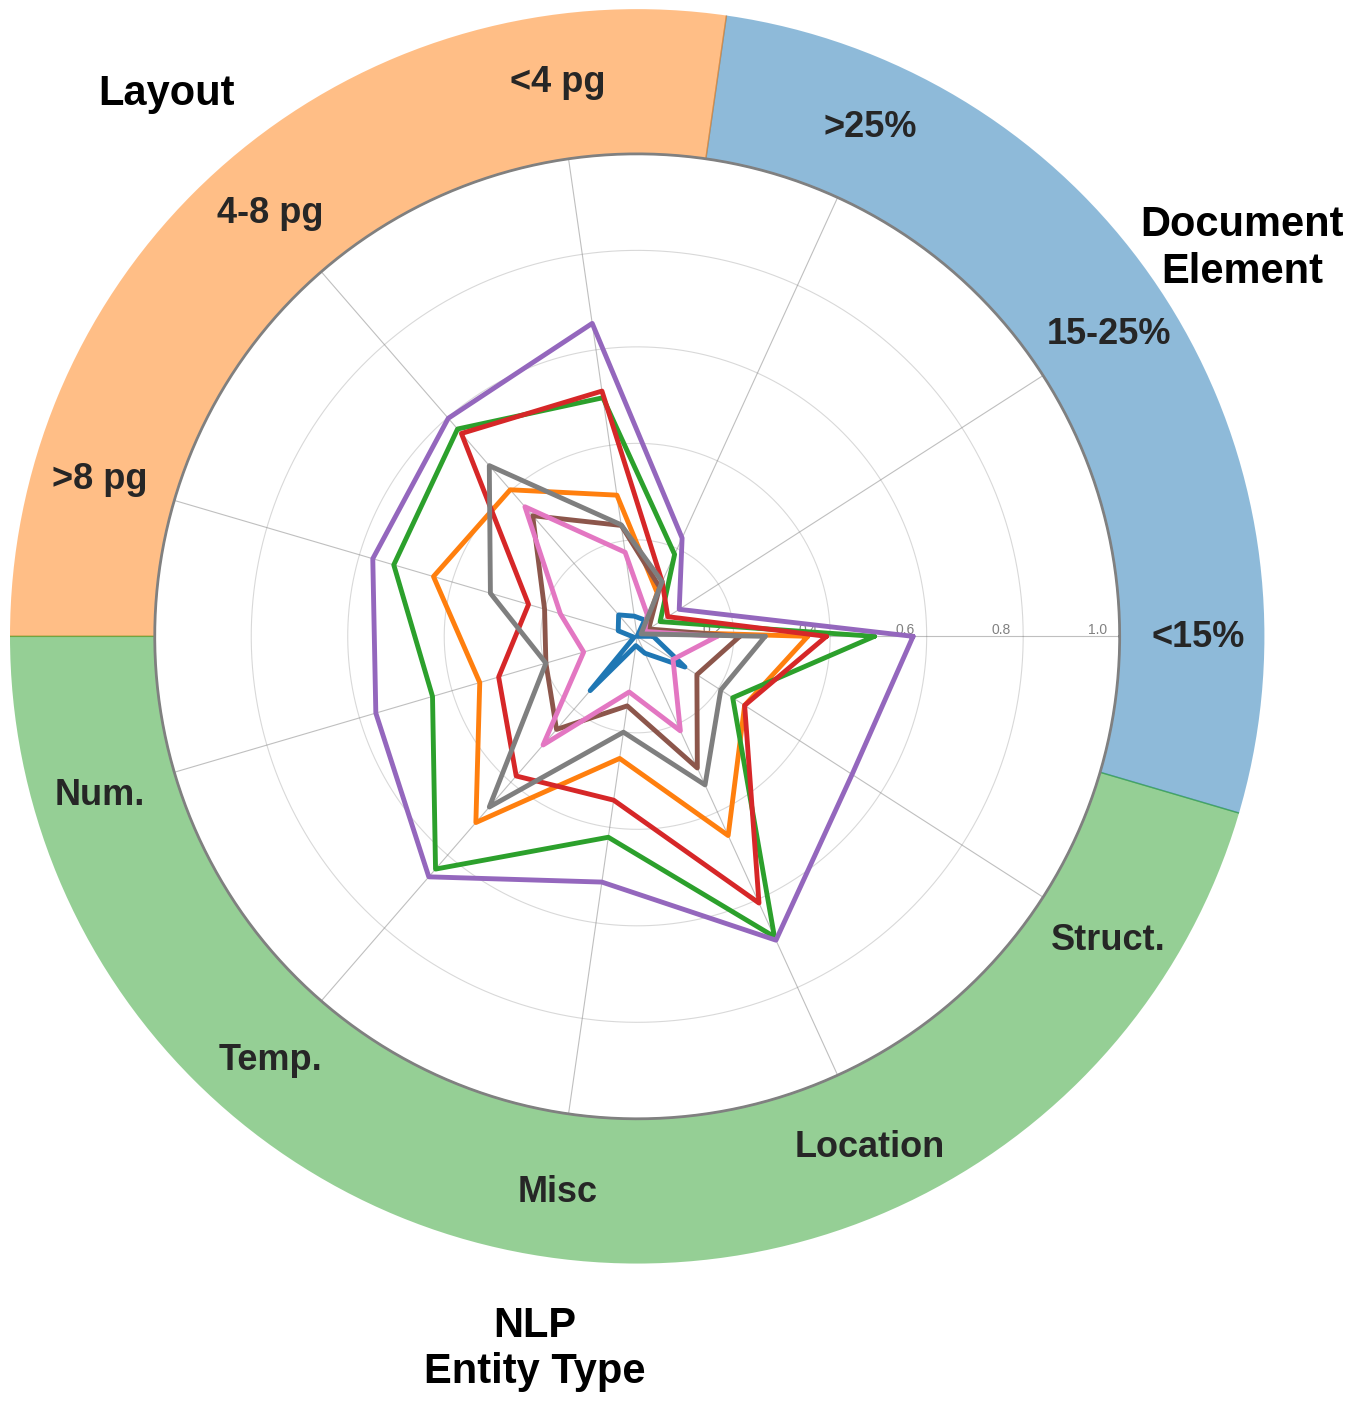

In [43]:


# 4. Generate the plot
try:
    fig, ax = create_radar_chart(
        labels=all_labels,
        datasets=plotting_datasets,
        category_names=category_names,
        category_spans=category_spans,
        category_colors=category_colors,
        fill_models=False,  # No fill as requested
        title=""
    )
    
    # Save the figure if needed
    dpi=200
    plt.savefig('MPDocVQA_QUR_RADAR_SAMPLE.svg', dpi=dpi, bbox_inches='tight')
    
    plt.show()
except ValueError as e:
    print(f"Error creating chart: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")